In [1]:
import pandas as pd
import numpy as np

There are 33 columns:

school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex: student's sex (binary: 'F' - female or 'M' - male)

age: student's age (numeric: from 15 to 22)

address: student's home address type (binary: 'U' - urban or 'R' - rural)

famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian: student's guardian (nominal: 'mother', 'father' or 'other')

traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures: number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup: extra educational support (binary: yes or no)

famsup: family educational support (binary: yes or no)

paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities: extra-curricular activities (binary: yes or no)

nursery: attended nursery school (binary: yes or no)

higher: wants to take higher education (binary: yes or no)

internet: Internet access at home (binary: yes or no)

romantic: with a romantic relationship (binary: yes or no)

famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime: free time after school (numeric: from 1 - very low to 5 - very high)

goout: going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health: current health status (numeric: from 1 - very bad to 5 - very good)

absences: number of school absences (numeric: from 0 to 93)

G1: first period grade (numeric: from 0 to 20)

G2: second period grade (numeric: from 0 to 20)

G3: final grade (numeric: from 0 to 20)

In [2]:
data=pd.read_csv("/content/student-mat.csv")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Final grade

In [4]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


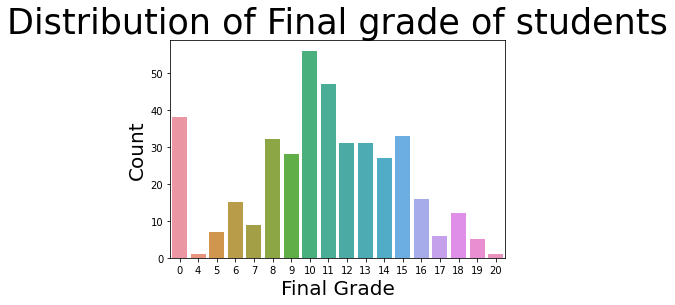

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
b = sns.countplot(data['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 35)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()


Something seems off here. Apart from the high number of students scoring 0, the distribution is normal as expected. Maybe the value 0 is used in place of null. Or maybe the students who did not appear for the exam, or were not allowed to sit for the exam due to some reason are marked as 0. We cannot be sure. Let us check the table for null values

In [6]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [7]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
male_studs = len(data[data['sex'] == 'M'])
female_studs = len(data[data['sex'] == 'F'])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

Number of male students: 187
Number of female students: 208


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


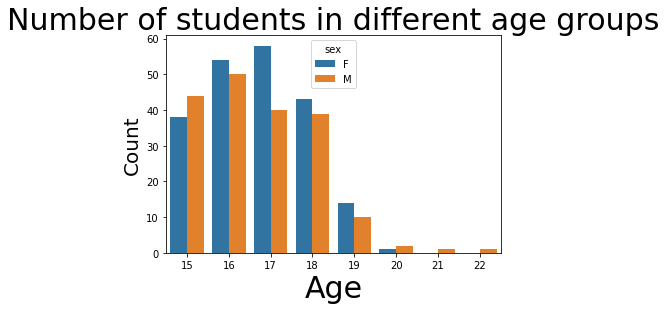

In [9]:
b = sns.countplot('age',hue='sex', data=data)
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


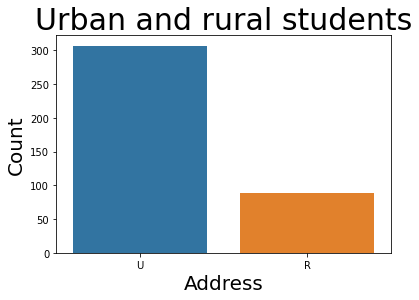

In [10]:
b = sns.countplot(data['address'])
b.axes.set_title('Urban and rural students', fontsize = 30)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [11]:
data.corr()['G3'].sort_values()


failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

From the data above, let's create one more column to get the average grade from G1 to G3 (3 years average):

In [12]:
data['GradeAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3


Now lets create a grading based on its G Average:

Above 90% = Grade A

Between 70% & 90% = Grade B

Below 70% = Grade C

In [13]:
def find_grade(data):
    # Create a list to store the data
    grades = []

    # For each row in the column,
    for row in data['GradeAvg']:
        # if more than a value,
        if row >= (0.9 * data['GradeAvg'].max()):
            # Append a letter grade
            grades.append('1')
        # else, if more than a value,
        elif row >= (0.7 * data['GradeAvg'].max()):
            # Append a letter grade
            grades.append('2')
        # else, if more than a value,
        elif row < (0.7 * data['GradeAvg'].max()):
            # Append a letter grade
            grades.append('3')   
    # Create a column from the list
    data['GradeAvg'] = grades
    return data

In [14]:
data_dum = find_grade(data)

Next, we can drop school name and age feature because it is not a computational value



In [15]:
data_dum.drop(["school","age"], axis=1, inplace=True)

In [16]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,3
1,F,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,3
2,F,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,3
3,F,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,2
4,F,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,3


In [17]:
#  yes / no values:
d = {'yes': 1, 'no': 0}
data_dum['schoolsup'] = data_dum['schoolsup'].map(d)
data_dum['famsup'] = data_dum['famsup'].map(d)
data_dum['paid'] = data_dum['paid'].map(d)
data_dum['activities'] = data_dum['activities'].map(d)
data_dum['nursery'] = data_dum['nursery'].map(d)
data_dum['higher'] = data_dum['higher'].map(d)
data_dum['internet'] = data_dum['internet'].map(d)
data_dum['romantic'] = data_dum['romantic'].map(d)

In [18]:
d = {'F': 1, 'M': 0}
data_dum['sex'] = data_dum['sex'].map(d)

# map the address data
d = {'U': 1, 'R': 0}
data_dum['address'] = data_dum['address'].map(d)

# map the famili size data
d = {'LE3': 1, 'GT3': 0}
data_dum['famsize'] = data_dum['famsize'].map(d)

# map the parent's status
d = {'T': 1, 'A': 0}
data_dum['Pstatus'] = data_dum['Pstatus'].map(d)

# map the parent's job
d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data_dum['Mjob'] = data_dum['Mjob'].map(d)
data_dum['Fjob'] = data_dum['Fjob'].map(d)

# map the reason data
d = {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data_dum['reason'] = data_dum['reason'].map(d)

# map the guardian data
d = {'mother': 0, 'father': 1, 'other': 2}
data_dum['guardian'] = data_dum['guardian'].map(d)


In [19]:
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
x=data_dum.drop("G3",axis=1)
y=data_dum['G3']

In [21]:
data_dum['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [22]:

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression 


In [24]:
L=LinearRegression()

In [25]:
L.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred=L.predict(X_test)

In [27]:
print(L.score(X_test, y_test)) 

0.7784877387043513
